In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import BaggingClassifier

import json
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.rcParams['figure.figsize'] = [20, 20]
%config InlineBackend.figure_format = 'retina'

In [2]:
data = load_breast_cancer(as_frame = True)

X_data = pd.DataFrame(data.data)
Y_data = pd.DataFrame(data.target)

In [3]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
list(data.target_names)

['malignant', 'benign']

In [5]:
X_data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [6]:
Y_data.head(10)

target
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0

In [7]:
X_data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [8]:
X_data.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [9]:
X_data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

## Univariable plots

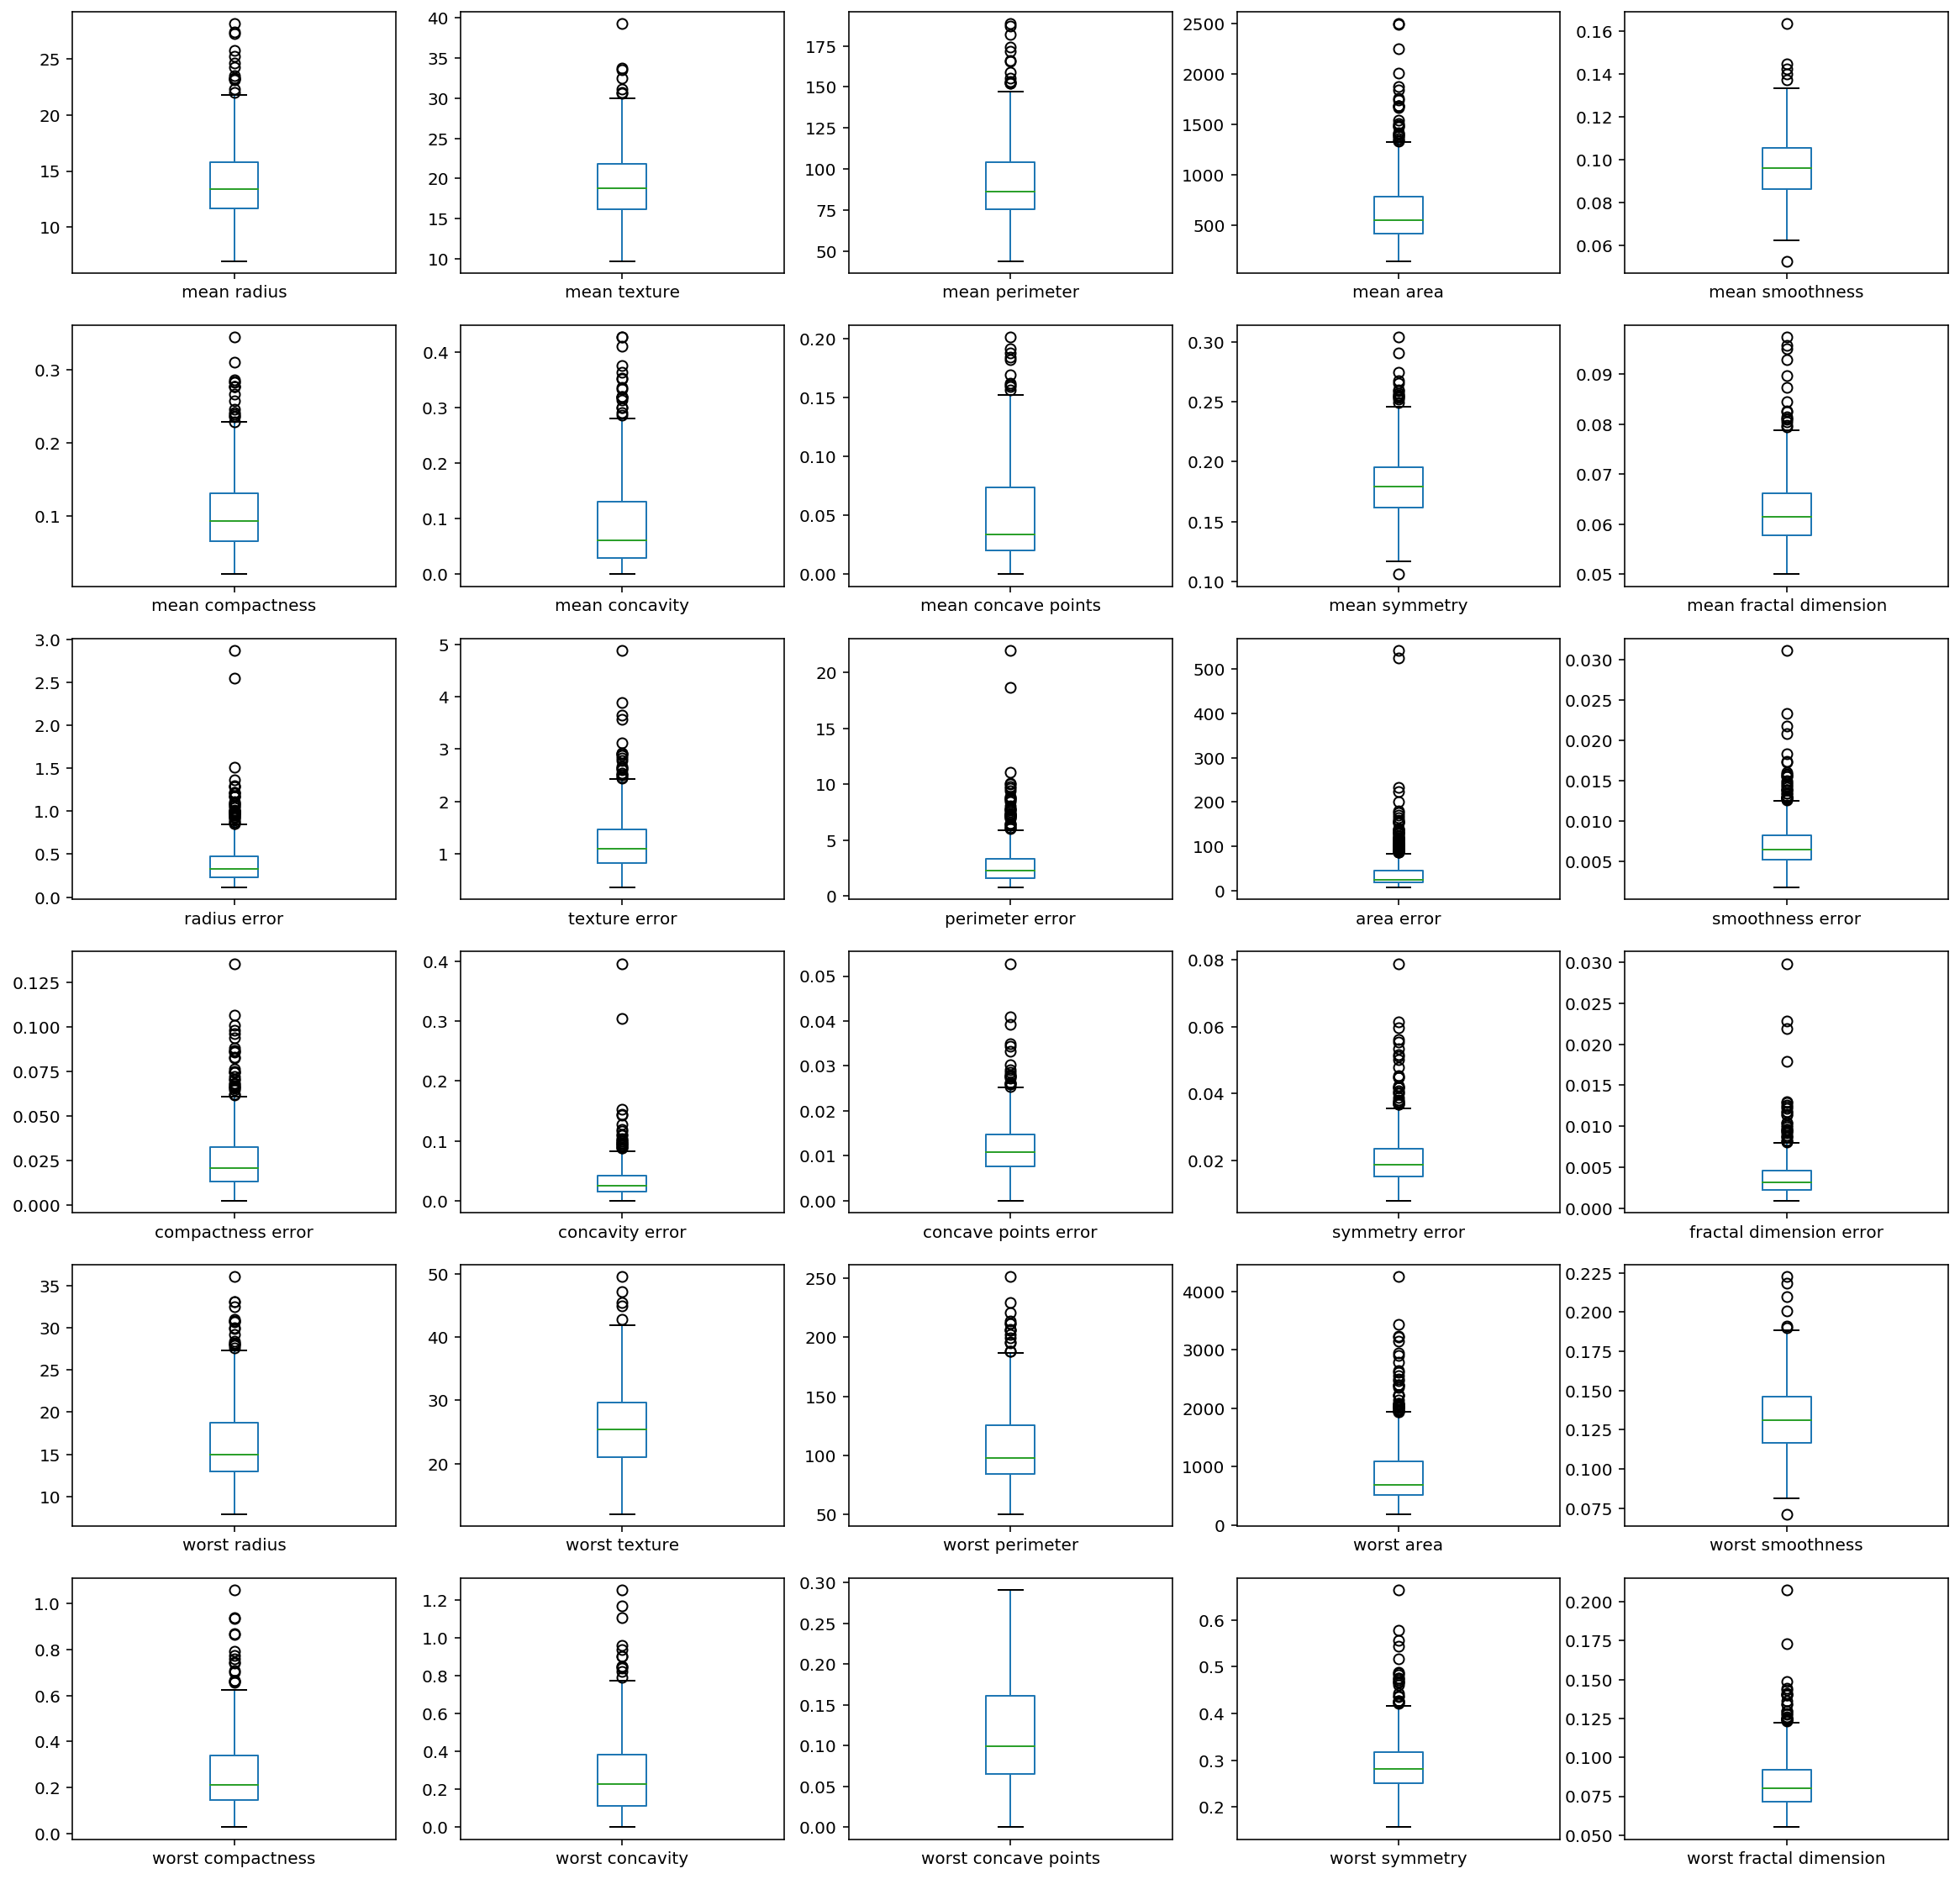

In [10]:
# box and whisker plots
X_data.plot(kind='box', subplots=True, layout=(6,5), sharex=False, sharey=False)
plt.show()

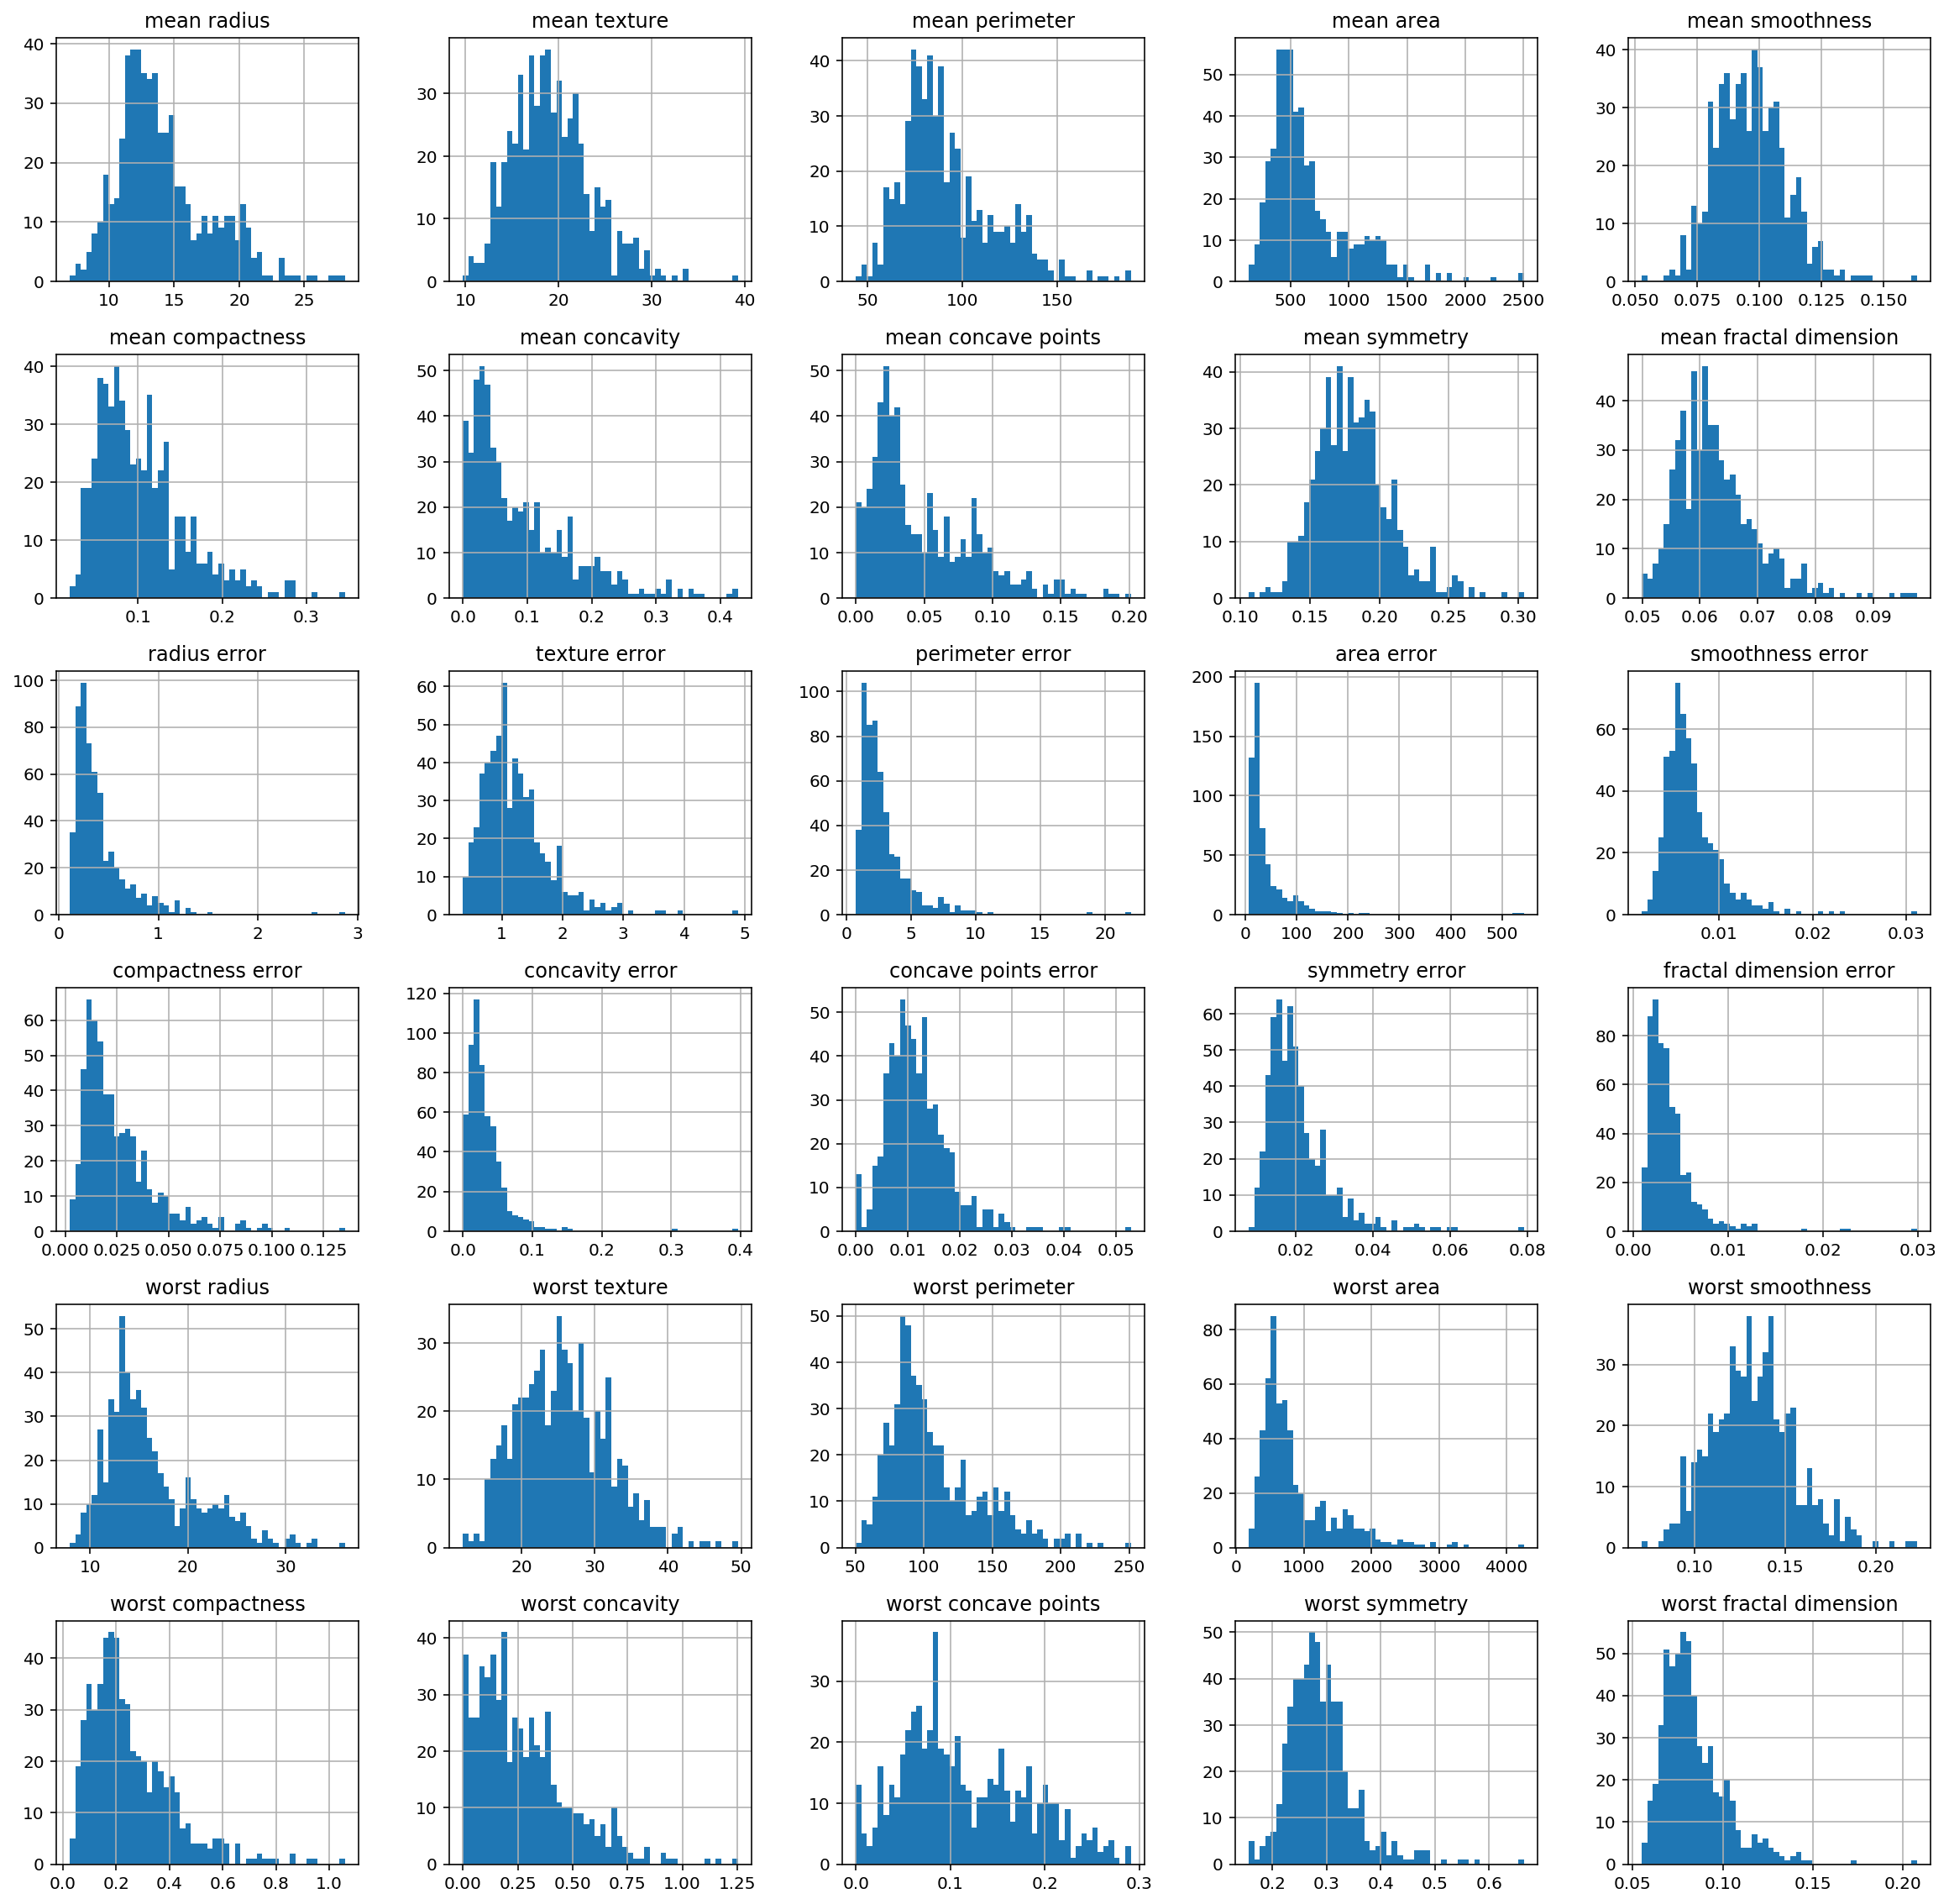

In [11]:
X_data.hist(bins = 50)
plt.show()

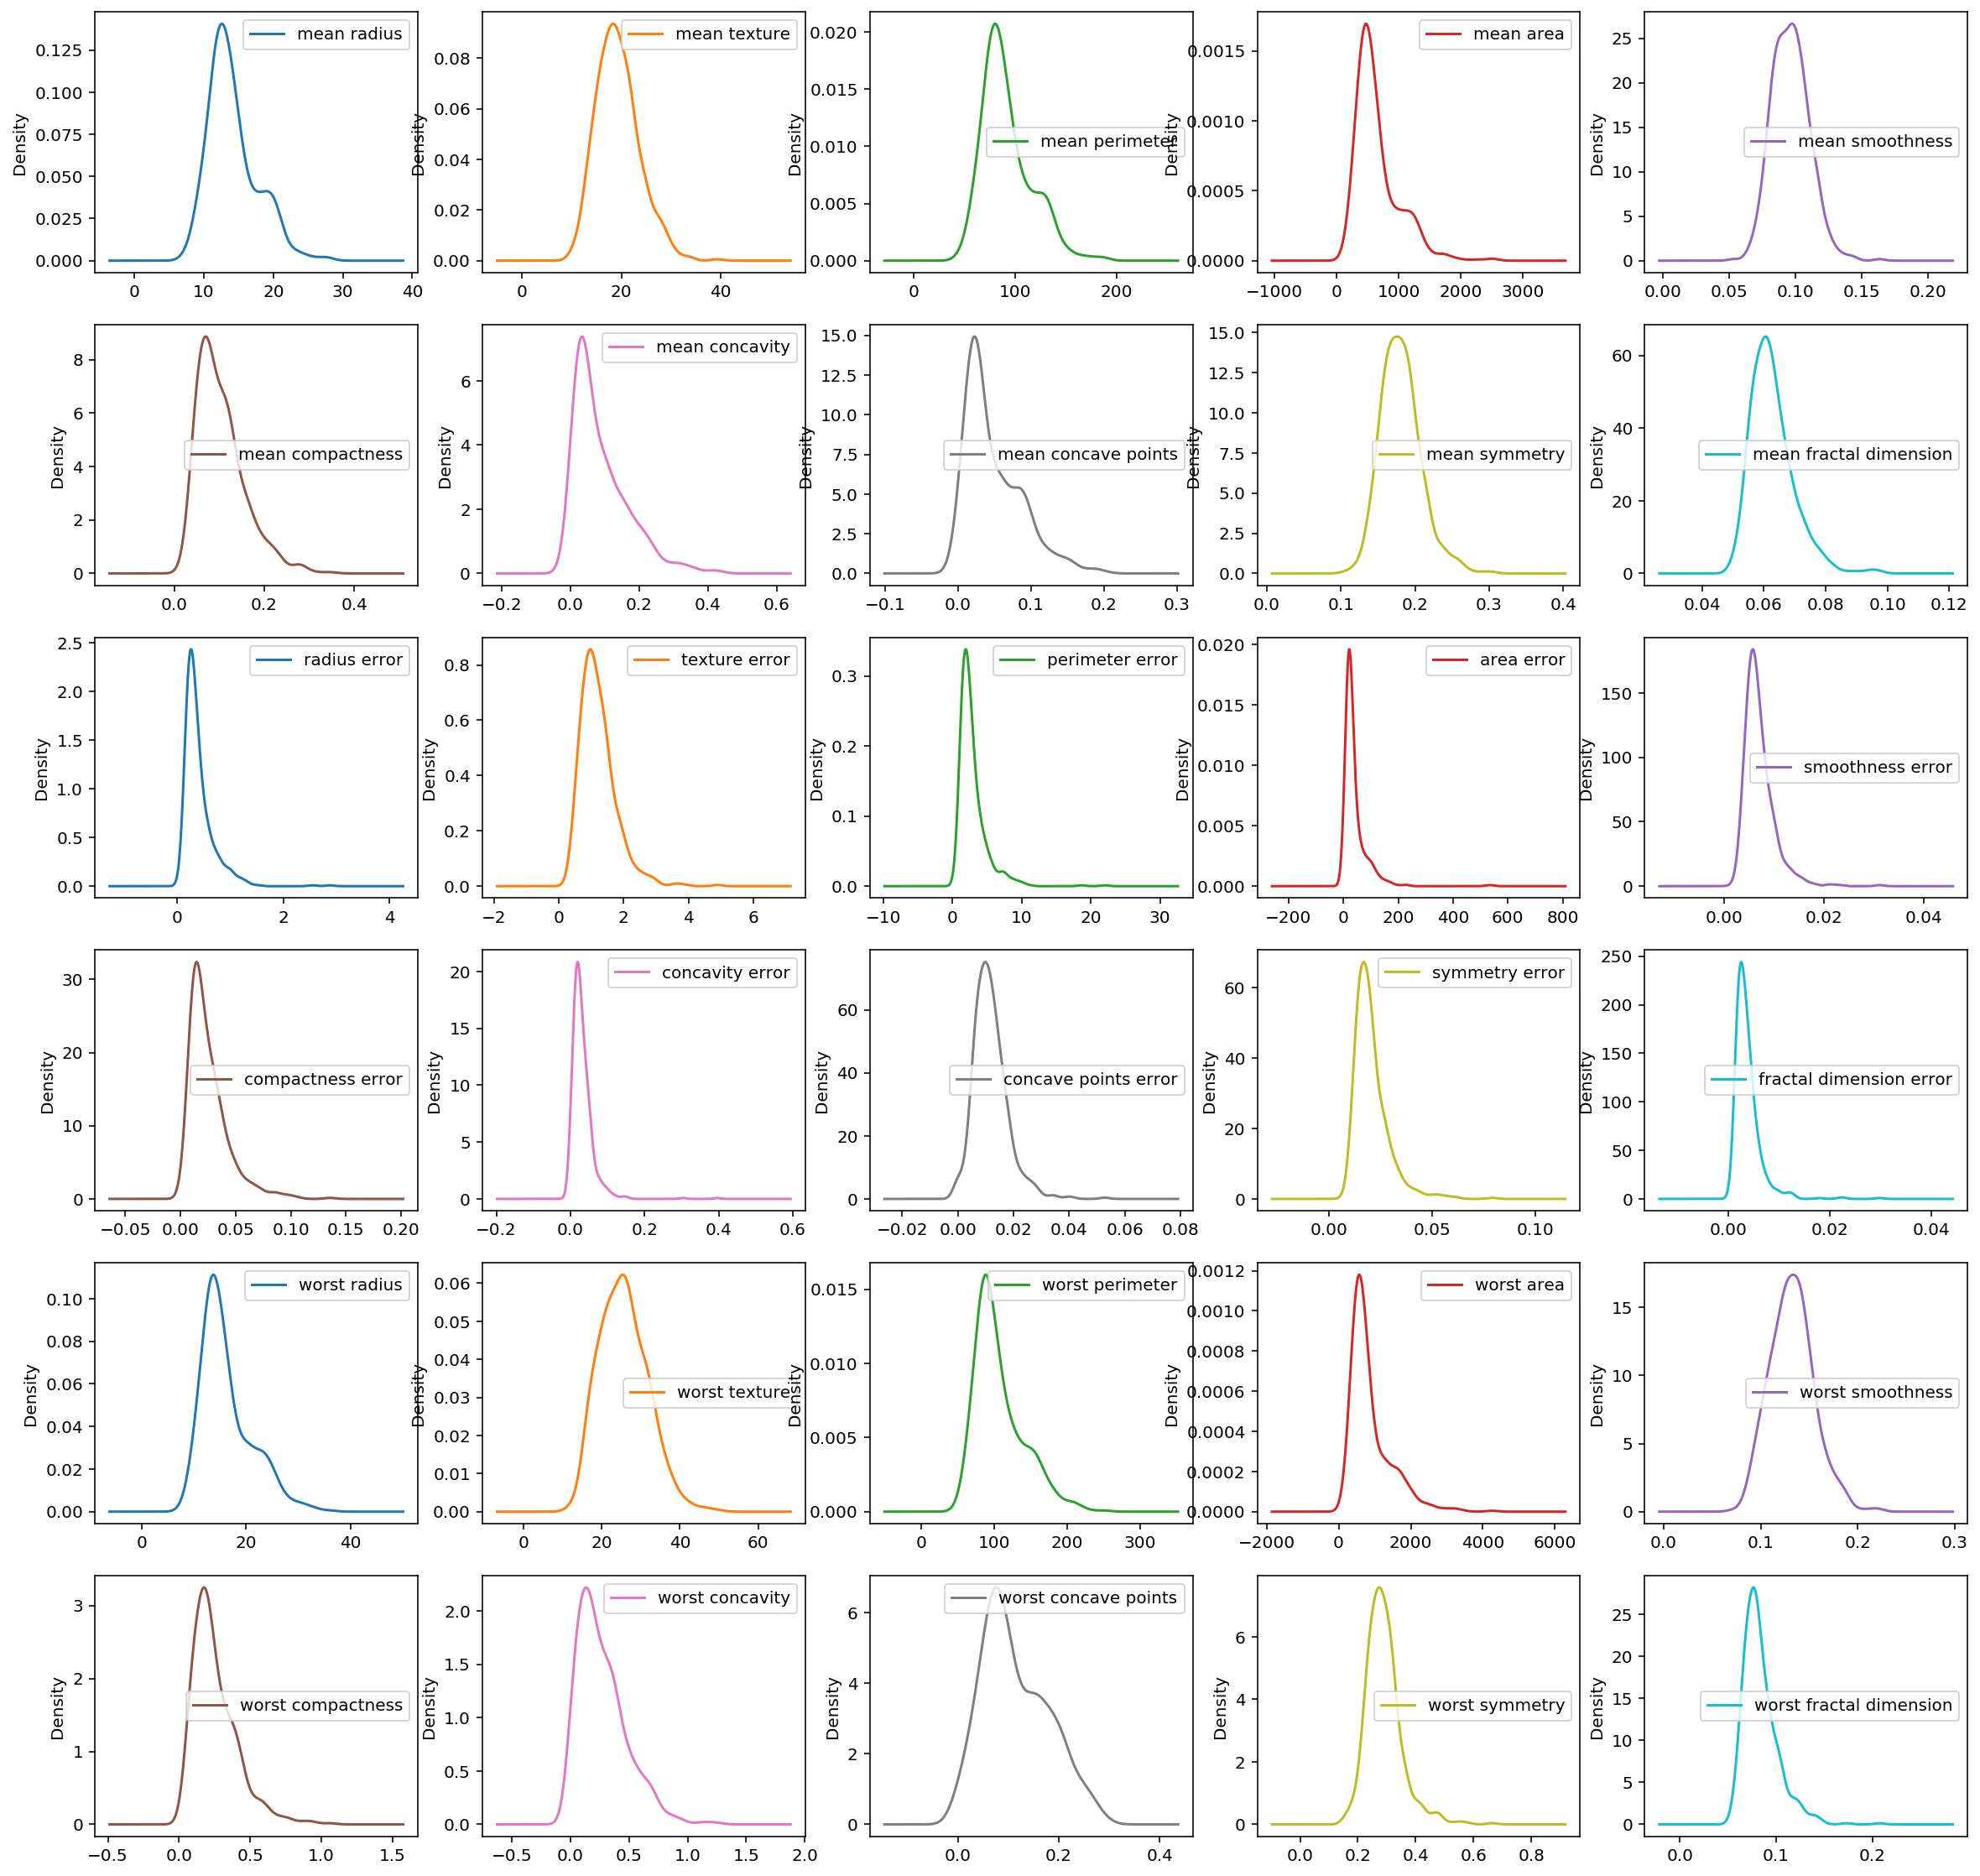

In [12]:
X_data.plot(kind='density', subplots=True, layout=(6,5), sharex=False, sharey=False)
plt.show()

## Multivariate Plots

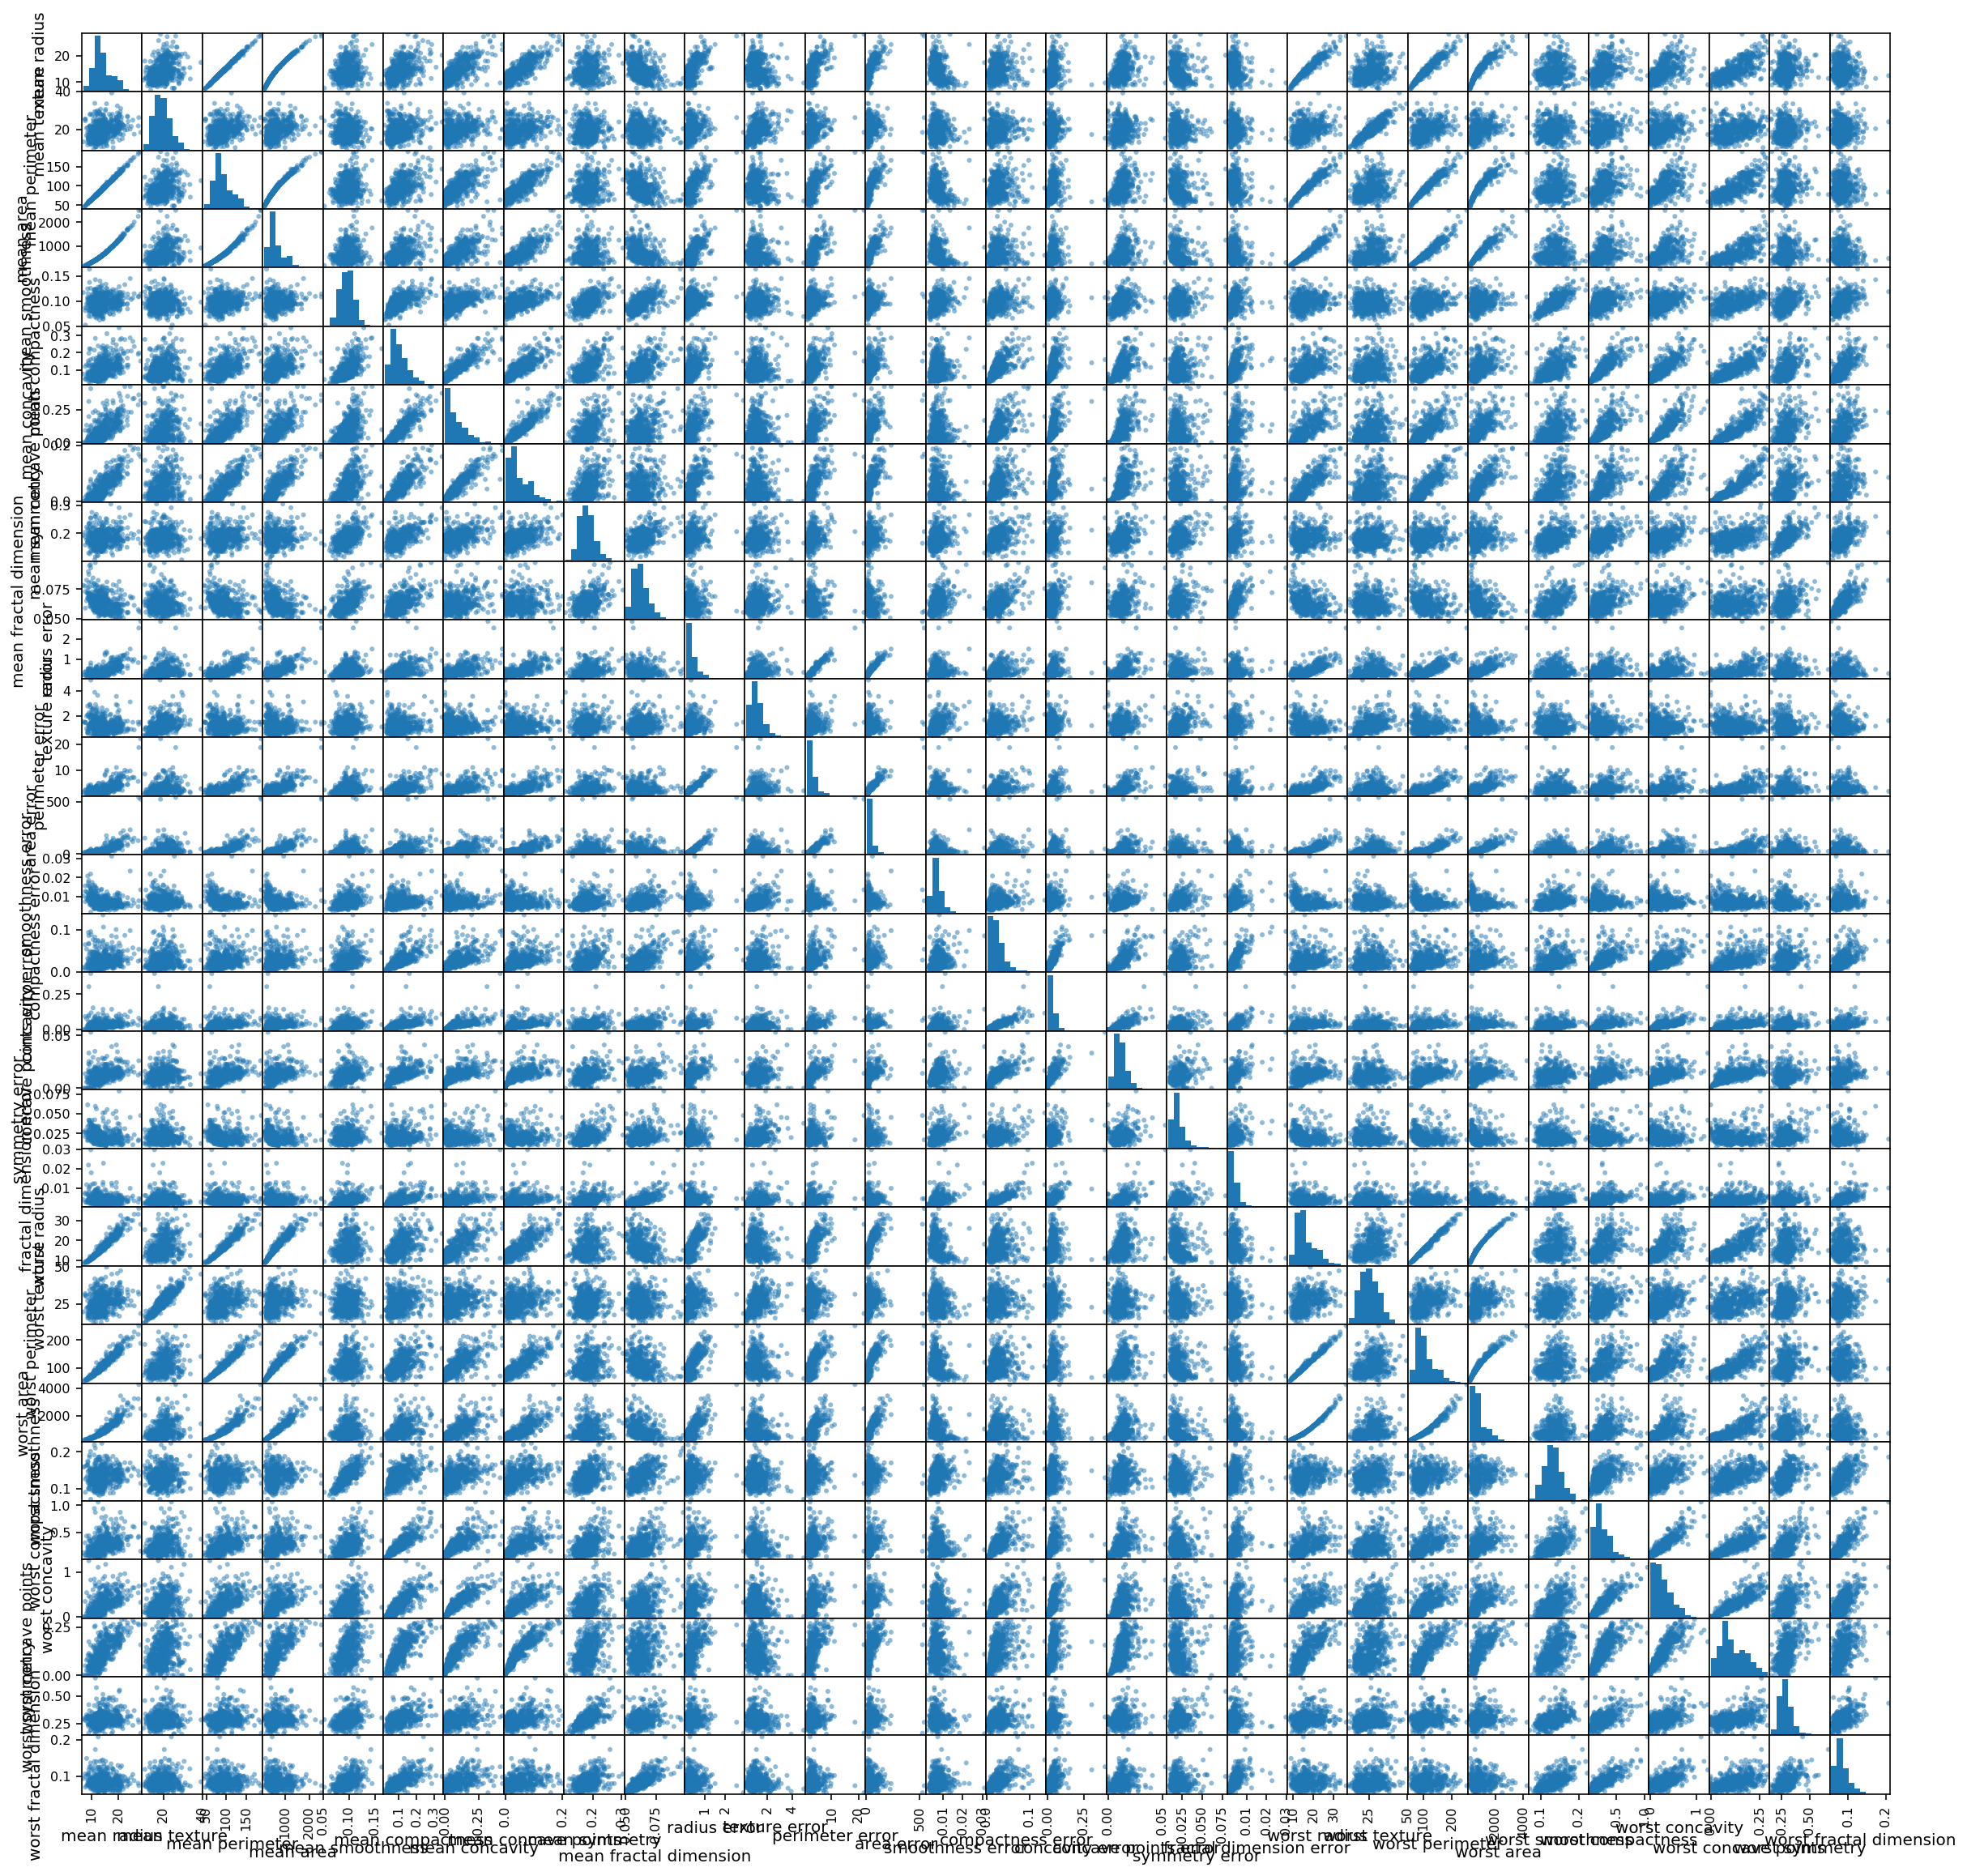

In [13]:
scatter_matrix(X_data)
plt.show()

In [14]:
correlations = X_data.corr()
correlations

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

In [15]:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

# Classical Algorithms Evaluation

In [16]:
validation_size = 0.20
seed = 7

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=validation_size, random_state=seed)

In [17]:
X_train.shape

(455, 30)

In [18]:
X_test.shape

(114, 30)

In [19]:
Y_train.shape

(455, 1)

In [20]:
Y_test.shape

(114, 1)

In [21]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.947005 (0.040051)
LDA: 0.958019 (0.027148)
KNN: 0.936232 (0.045443)
CART: 0.922802 (0.050673)
NB: 0.933720 (0.041136)
SVM: 0.907295 (0.057778)
RFC: 0.953575 (0.036377)


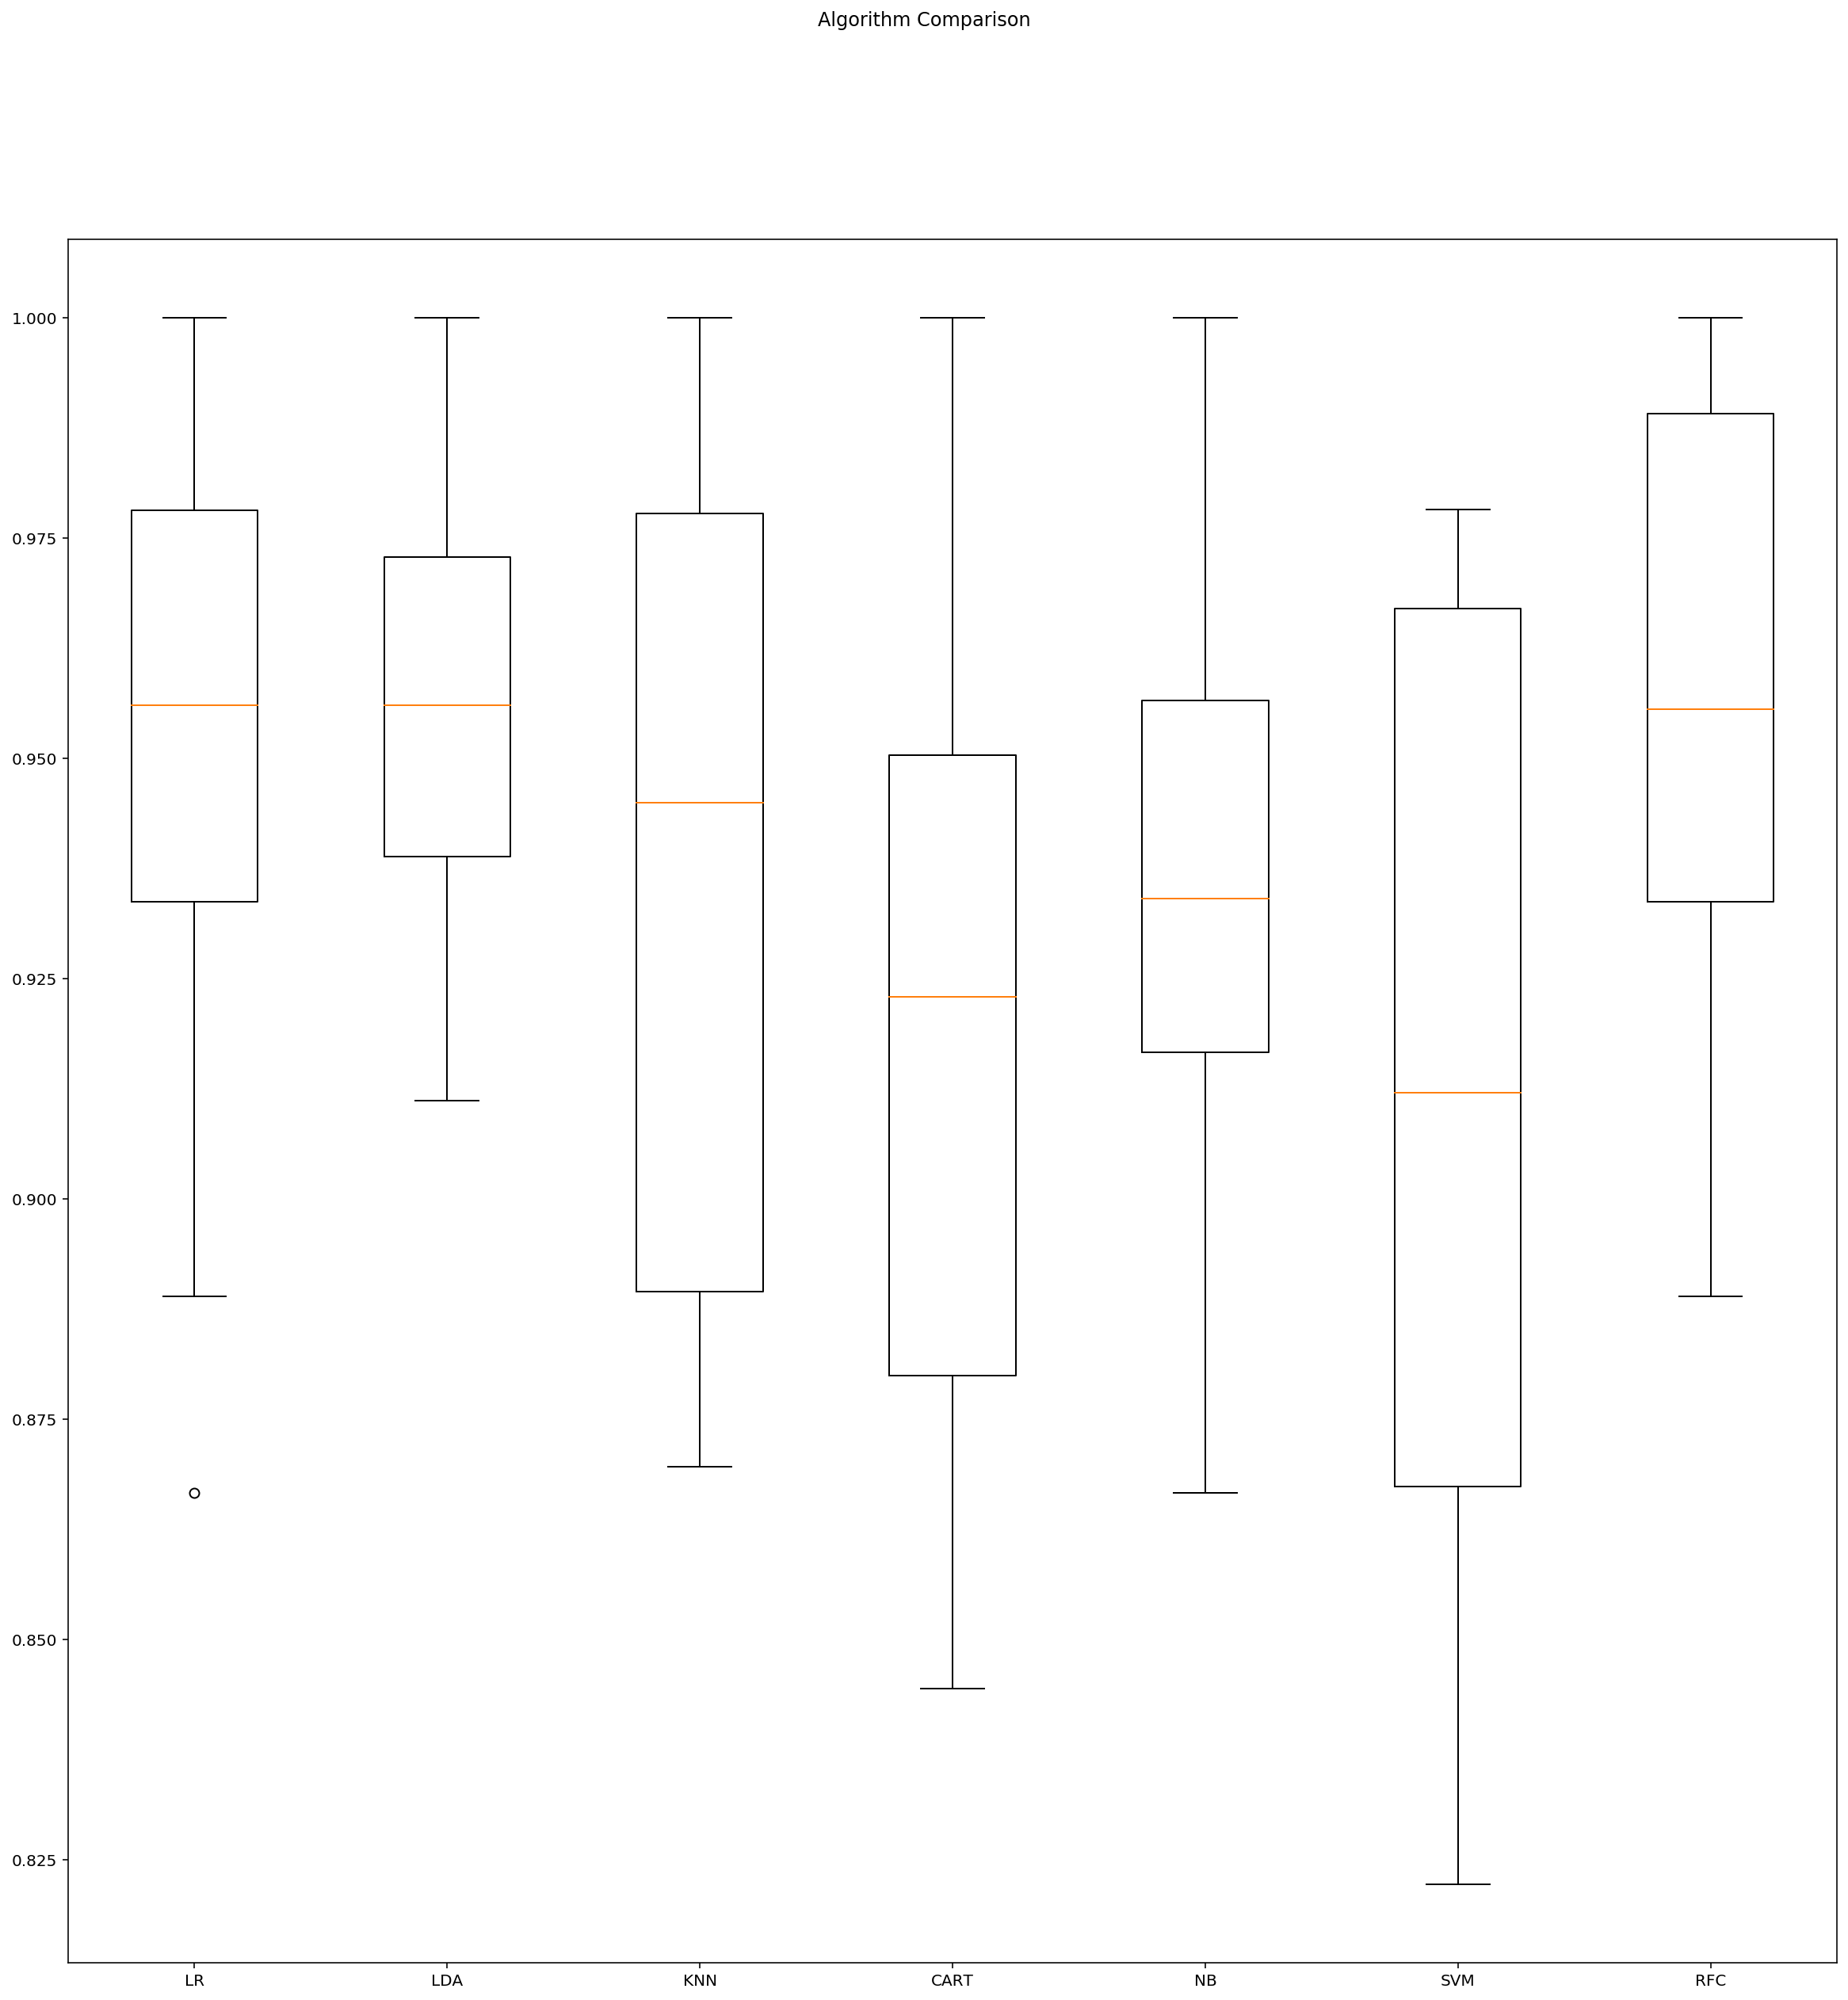

In [22]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [23]:
# Make predictions on validation dataset
lda = RandomForestClassifier()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_test)

accuracy = accuracy_score(Y_test, predictions)

print("Model accuracy: {:.2f}%".format(accuracy*100))
print("")
print(confusion_matrix(Y_test, predictions))
print("")
print(classification_report(Y_test, predictions))

Model accuracy: 98.25%

[[38  2]
 [ 0 74]]

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.97      1.00      0.99        74

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



# Best predictors selection (testing only)

In [24]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, Y_train)

In [25]:
scores = fit.scores_

In [26]:
combined = dict(zip(data.feature_names[:6], scores[:6]))
combined = dict(sorted(combined.items(), key=lambda x:x[1], reverse=True))

json_object = json.dumps(combined, indent = 4) 
print(json_object)

{
    "mean area": 44869.74104314177,
    "mean perimeter": 1656.303435635357,
    "mean radius": 220.76365336351492,
    "mean texture": 71.15470059907443,
    "mean compactness": 3.9081931977782753,
    "mean smoothness": 0.11402511126805381
}


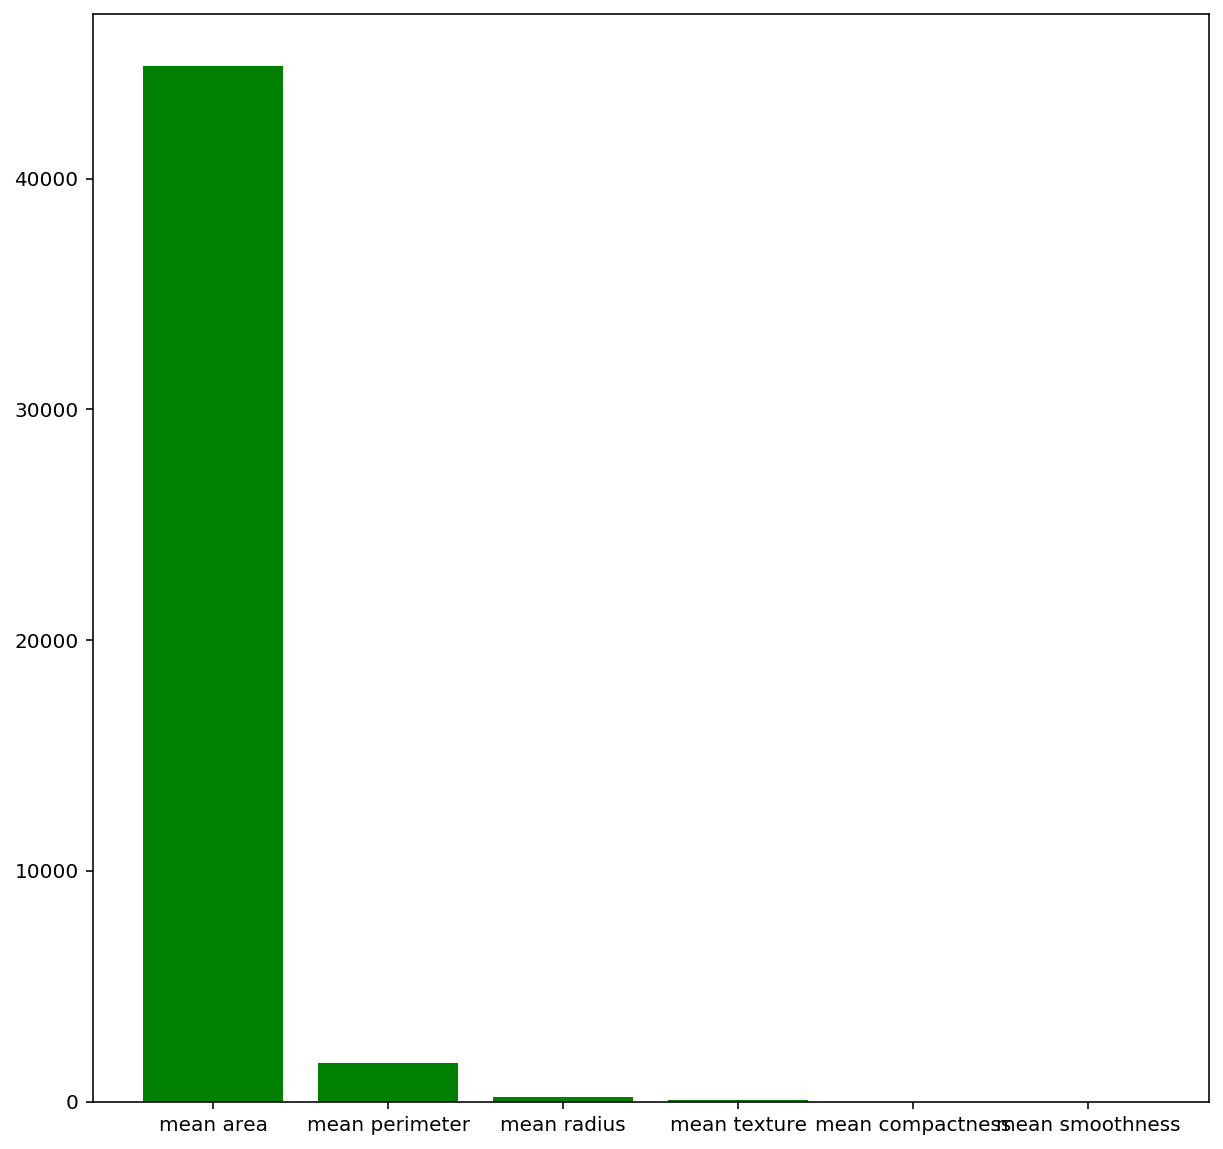

In [27]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.bar(combined.keys(), combined.values(), color='g')
plt.show()

# Ensemble algorithms

In [28]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)

# create the sub models
estimators = []
model1 = LinearDiscriminantAnalysis()

estimators.append(('lda', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

In [29]:
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_data, Y_data, cv=kfold)
print(results.mean())

0.9543546365914788


In [30]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('RFC', RandomForestClassifier()))

scoring = 'neg_mean_squared_error' # less value less error
num_folds = 10
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: -0.039807 (0.034178)
GBM: -0.044203 (0.035923)
RF: -0.044203 (0.040900)
ET: -0.037585 (0.032999)
RFC: -0.044251 (0.040978)


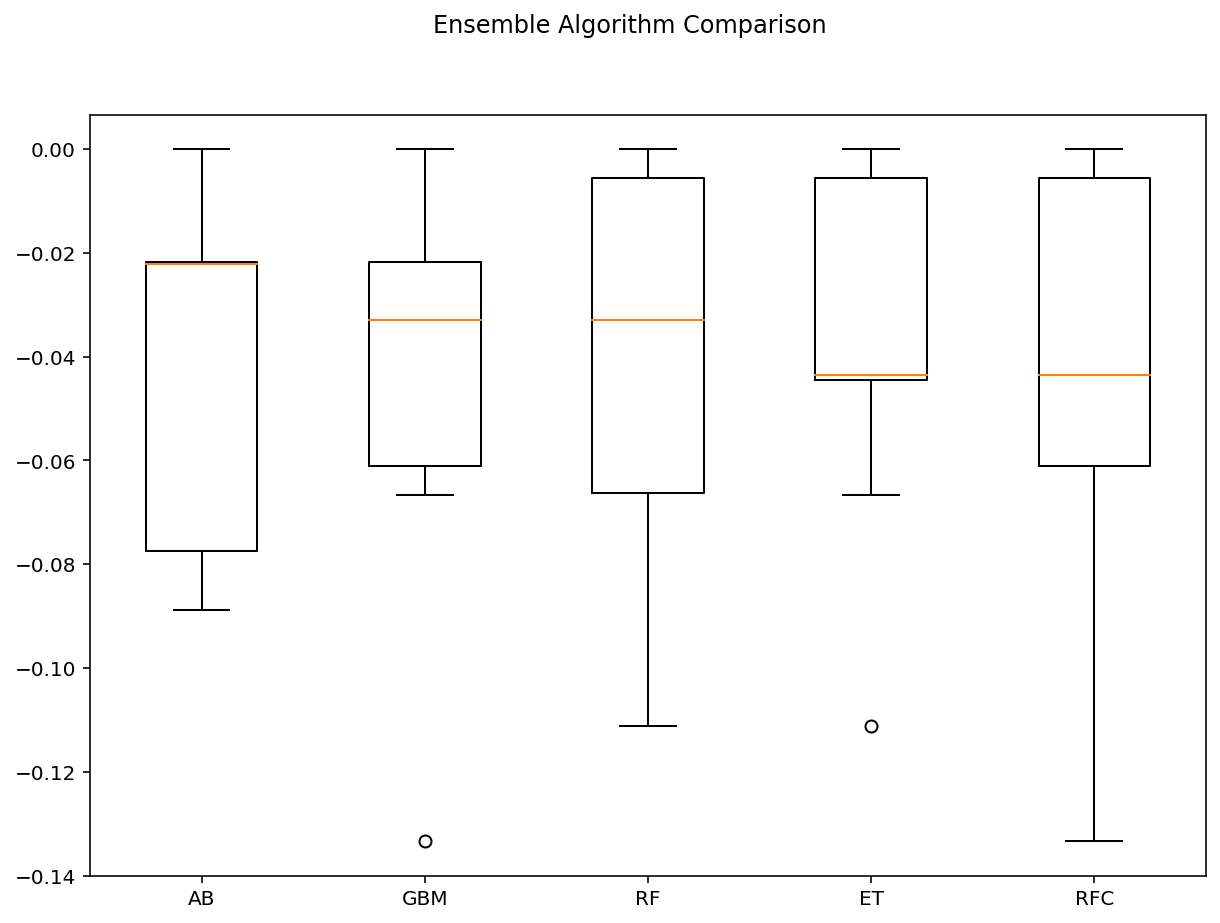

In [31]:
# Compare Algorithms
plt.rcParams['figure.figsize'] = [10, 7]
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [32]:
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
cart = LinearDiscriminantAnalysis()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = cross_val_score(model, X_data, Y_data, cv=kfold)
print(results.mean())

0.9543546365914788


In [33]:
kfold = KFold(n_splits=10, random_state=7, shuffle = True)

# create the sub models
estimators = []
#model1 = LinearDiscriminantAnalysis()
#estimators.append(('lda', model1))

model1 = RandomForestClassifier(random_state = 2022, n_jobs = -1, n_estimators = 10000, verbose=0)
estimators.append(('rfc', model1))

#model2 = DecisionTreeClassifier()
#estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))

model4 = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('gbc', model4))

#model5 = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
#estimators.append(('adb', model5))

#model6 = BaggingClassifier(base_estimator=model1, n_estimators=num_trees, random_state=seed)
#estimators.append(('bagg', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_data, Y_data, cv=kfold)
print(results.mean())

0.9648496240601503


In [39]:
ensemble.fit(X_train, Y_train)
Y_pred = ensemble.predict(X_test)

In [40]:
accuracy = round(100 * accuracy_score(Y_test, Y_pred), 2)
print("Model accuracy: {:.2f}%".format(accuracy))

Model accuracy: 99.12%
